In [1]:
# Reference: https://youtu.be/zNalsMIB3NE
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

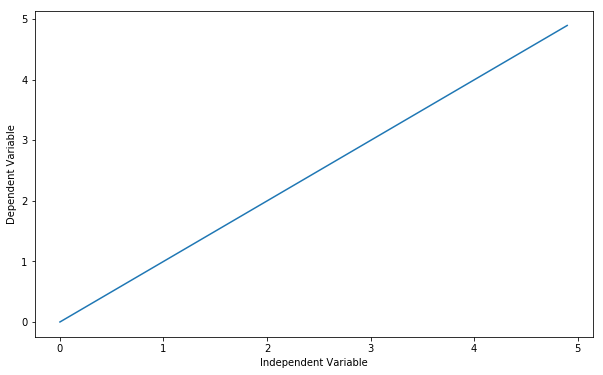

In [5]:
a = 1
b = 0
Y = a * X + b

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [6]:
 x_data = np.random.rand(100).astype(np.float32)

In [7]:
print(x_data)

[ 0.16642383  0.95365566  0.79447943  0.59241205  0.37511587  0.61679858
  0.54604691  0.25005215  0.74354893  0.63996518  0.72971898  0.26483089
  0.65822232  0.94177443  0.58996409  0.91864705  0.29326904  0.1294518
  0.74174923  0.31732777  0.14445585  0.12722476  0.05462266  0.20515051
  0.32616502  0.7578755   0.4023543   0.09796248  0.5069766   0.50081193
  0.67672759  0.9700262   0.68490553  0.49928766  0.32440484  0.84246331
  0.90377206  0.80565512  0.88774413  0.77379465  0.59886116  0.0956556
  0.30227333  0.45663357  0.99801135  0.97857165  0.02006707  0.96270549
  0.04028146  0.99710625  0.9597398   0.83926189  0.42162746  0.78591144
  0.95147932  0.69352615  0.34026909  0.76544619  0.88544023  0.13669389
  0.72038972  0.09682097  0.46830109  0.15165512  0.80108899  0.23435965
  0.29336748  0.4279806   0.68010056  0.58522731  0.44109121  0.91114205
  0.34863734  0.22548637  0.69342273  0.09184931  0.08484635  0.47713163
  0.11011343  0.06308017  0.85616505  0.50120336  0.7

In [8]:
# Y = 3X + 2
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [9]:
print(y_data)

[ 2.58110233  4.56546582  4.32401477  3.78940296  2.96679182  3.92417032
  3.66713992  2.7508007   4.23723679  3.87783538  4.23309219  2.84120879
  3.99527808  4.8657353   3.7959497   4.64432158  2.65521264  2.26676703
  4.19081438  3.20884557  2.52559208  2.32954493  2.07774742  2.55757885
  3.1095406   4.34644538  3.35145068  2.36045938  3.69603747  3.41166722
  3.94588608  4.95973834  4.06163196  3.36436986  2.92611561  4.27420262
  4.7823632   4.34496875  4.66746856  4.18325092  3.74691662  2.34789298
  2.81975424  3.47494527  4.91783086  4.84578975  2.0978592   4.90739618
  2.13601337  5.06739866  4.82750804  4.55175082  3.33423527  4.4808968
  4.92654617  4.0944293   2.8847735   4.35216344  4.626055    2.26114942
  4.12790555  2.09571668  3.36930835  2.44779819  4.43454301  2.68008131
  2.80973181  3.13876834  4.01128503  3.82412025  3.46029759  4.68443702
  3.01919409  2.8040296   4.12055609  2.34030946  2.32110094  3.5301786
  2.33091821  2.21351836  4.60185052  3.28371834  4.0

In [10]:
zip(x_data,y_data) [0:5]

[(0.16642383, 2.5811023321070108),
 (0.95365566, 4.5654658243849262),
 (0.79447943, 4.3240147665533684),
 (0.59241205, 3.7894029630102786),
 (0.37511587, 2.9667918239185038)]

In [11]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [12]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [15]:
# init = tf.initialize_all_variables() # deprecated
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [16]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

(0, [2.6743078, 3.0496771])
(5, [2.4940257, 2.2758944])
(10, [2.6339409, 2.1988585])
(15, [2.7330706, 2.1427934])
(20, [2.8037589, 2.1028175])
(25, [2.8541651, 2.0743117])
(30, [2.8901083, 2.0539851])
(35, [2.9157386, 2.0394905])
(40, [2.934015, 2.0291548])
(45, [2.9470477, 2.0217845])
(50, [2.9563408, 2.0165293])
(55, [2.9629672, 2.0127816])
(60, [2.9676926, 2.0101094])
(65, [2.9710619, 2.0082037])
(70, [2.9734645, 2.0068452])
(75, [2.9751778, 2.0058763])
(80, [2.9763994, 2.0051854])
(85, [2.9772708, 2.0046928])
(90, [2.9778922, 2.0043414])
(95, [2.9783351, 2.0040908])


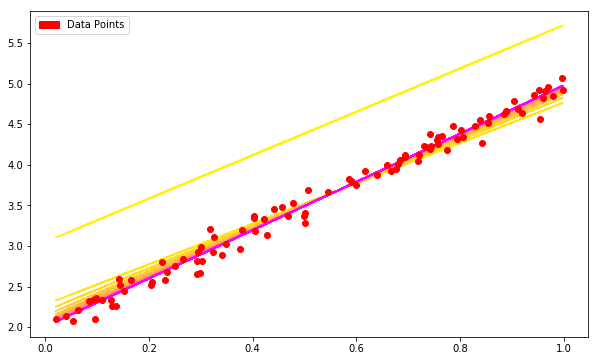

In [19]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg, cb))
    
plt.plot(x_data, y_data, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()